In [1]:
# Load the Dataset
import pandas as pa

# import Data from .xlsv file
File_path="F:/DS/bird observation project/Bird_Monitoring_Data_GRASSLAND.XLSX"
#Load all Sheet
Grassland_birds_sheets=pa.read_excel(File_path,sheet_name=None)
#Combine all sheets in single DataFrame
Grassland_df=pa.concat(Grassland_birds_sheets.values(),ignore_index=True)

#Display Data
print("Grassland Birds Dataset:\n",Grassland_df.head())


Grassland Birds Dataset:
   Admin_Unit_Code Sub_Unit_Code  Plot_Name Location_Type  Year       Date  \
0            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
1            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
2            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
3            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
4            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   

  Start_Time  End_Time          Observer Visit  ... AOU_Code  \
0   05:35:00  05:45:00  Elizabeth Oswald     1  ...     CHSP   
1   05:35:00  05:45:00  Elizabeth Oswald     1  ...     EABL   
2   05:35:00  05:45:00  Elizabeth Oswald     1  ...     GRSP   
3   05:35:00  05:45:00  Elizabeth Oswald     1  ...     EABL   
4   05:35:00  05:45:00  Elizabeth Oswald     1  ...     FISP   

  PIF_Watchlist_Status Regional_Stewardship_Status Temperature Humidity  \
0                False                       False 

C:\Users\nsiva\AppData\Local\Temp\ipykernel_27136\1228823036.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Grassland_df=pa.concat(Grassland_birds_sheets.values(),ignore_index=True)


EDA

In [2]:
# check for Missing Values 
print("Missing Values of Grassland Birds per column\n",Grassland_df.isnull().sum())
# Missing value per column
missing_values=Grassland_df.isnull().sum()
#Filter columns with missing value
Missing_values_Column=missing_values[missing_values>0]

Missing Values of Grassland Birds per column
 Admin_Unit_Code                   0
Sub_Unit_Code                  8531
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                       1394
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                      24
TaxonCode                         2
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance       

C:\Users\nsiva\AppData\Local\Temp\ipykernel_27136\1912352915.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=Missing_values_Column.index,y=Missing_values_Column.values,palette="coolwarm")


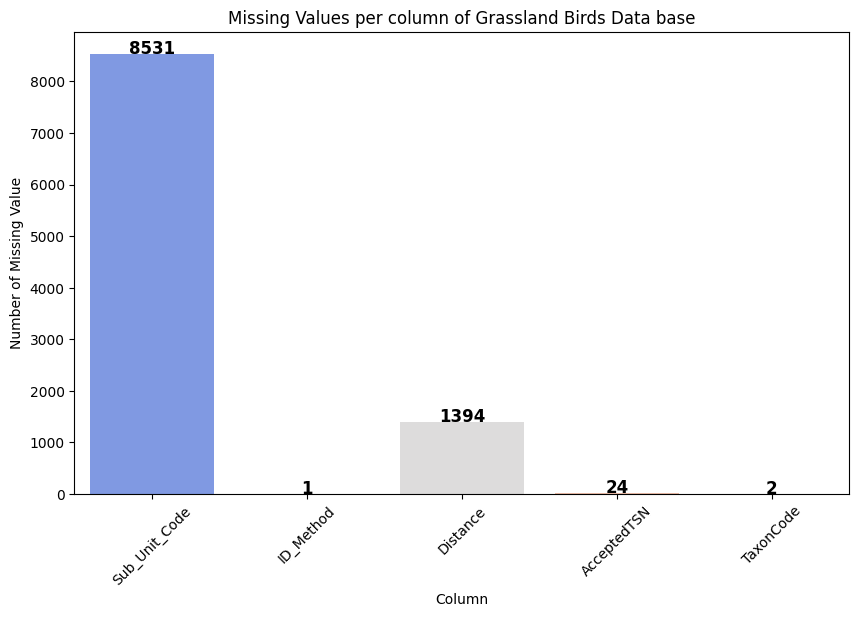

In [3]:
# visualizing the missing value
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax=sns.barplot(x=Missing_values_Column.index,y=Missing_values_Column.values,palette="coolwarm")
for i,v in enumerate(Missing_values_Column.values):
    ax.text(i,v+5,str(v),ha="center", fontsize=12, fontweight="bold", color="black")
plt.xticks(rotation=45)
plt.ylabel("Number of Missing Value")
plt.xlabel("Column")
plt.title("Missing Values per column of Grassland Birds Data base")
plt.show()


In [4]:
# Drop Missing values column with 50% missing data
Grassland_df.dropna(thresh=len(Grassland_df)*0.5,axis=1,inplace=True)



In [5]:
#Fill numerical column with mean
Grassland_df.fillna(Grassland_df.select_dtypes(include=['number']).mean(), inplace=True)

In [6]:
Grassland_df.isnull().sum()

Admin_Unit_Code                   0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                       1394
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       0
TaxonCode                         0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Previously_Obs                    0
Initial_Three_Min_Cnt       

In [7]:
# Fill categorical columns
Grassland_df['ID_Method'].fillna(Grassland_df['ID_Method'].mode()[0],inplace=True)


C:\Users\nsiva\AppData\Local\Temp\ipykernel_27136\2784321117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Grassland_df['ID_Method'].fillna(Grassland_df['ID_Method'].mode()[0],inplace=True)


In [8]:
# Find the count values
Grassland_df.count()

Admin_Unit_Code                8531
Plot_Name                      8531
Location_Type                  8531
Year                           8531
Date                           8531
Start_Time                     8531
End_Time                       8531
Observer                       8531
Visit                          8531
Interval_Length                8531
ID_Method                      8531
Distance                       7137
Flyover_Observed               8531
Sex                            8531
Common_Name                    8531
Scientific_Name                8531
AcceptedTSN                    8531
TaxonCode                      8531
AOU_Code                       8531
PIF_Watchlist_Status           8531
Regional_Stewardship_Status    8531
Temperature                    8531
Humidity                       8531
Sky                            8531
Wind                           8531
Disturbance                    8531
Previously_Obs                 8531
Initial_Three_Min_Cnt       

In [9]:
# filling missing values
mode_value=Grassland_df['Distance'].mode()[0]
Grassland_df['Distance'].fillna(mode_value, inplace=True)

C:\Users\nsiva\AppData\Local\Temp\ipykernel_27136\257718838.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Grassland_df['Distance'].fillna(mode_value, inplace=True)


In [10]:
Grassland_df.head(5)

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [11]:
# Round to 0 
Grassland_df['Temperature']=Grassland_df['Temperature'].round(0).astype(int)
Grassland_df['Humidity']=Grassland_df['Humidity'].round(0).astype(int)

In [12]:
#display sample value upto 3 values
Grassland_df.head(3)

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,CHSP,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,...,EABL,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,GRSP,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [13]:
# Count of  Duplicates
print(f"Duplicate rows:{Grassland_df.duplicated().sum()}")
# Drop the Duplicate values
Grassland_df.drop_duplicates(inplace=True)

Duplicate rows:1705


In [16]:
# count after removing duplication
Grassland_df.count()

Admin_Unit_Code                6826
Plot_Name                      6826
Location_Type                  6826
Year                           6826
Date                           6826
Start_Time                     6826
End_Time                       6826
Observer                       6826
Visit                          6826
Interval_Length                6826
ID_Method                      6826
Distance                       6826
Flyover_Observed               6826
Sex                            6826
Common_Name                    6826
Scientific_Name                6826
AcceptedTSN                    6826
TaxonCode                      6826
AOU_Code                       6826
PIF_Watchlist_Status           6826
Regional_Stewardship_Status    6826
Temperature                    6826
Humidity                       6826
Sky                            6826
Wind                           6826
Disturbance                    6826
Previously_Obs                 6826
Initial_Three_Min_Cnt       

In [17]:
Grassland_df.head(5)

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,CHSP,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,...,EABL,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,GRSP,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,EABL,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,FISP,False,True,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [15]:
Grassland_df.count()

Admin_Unit_Code                6826
Plot_Name                      6826
Location_Type                  6826
Year                           6826
Date                           6826
Start_Time                     6826
End_Time                       6826
Observer                       6826
Visit                          6826
Interval_Length                6826
ID_Method                      6826
Distance                       6826
Flyover_Observed               6826
Sex                            6826
Common_Name                    6826
Scientific_Name                6826
AcceptedTSN                    6826
TaxonCode                      6826
AOU_Code                       6826
PIF_Watchlist_Status           6826
Regional_Stewardship_Status    6826
Temperature                    6826
Humidity                       6826
Sky                            6826
Wind                           6826
Disturbance                    6826
Previously_Obs                 6826
Initial_Three_Min_Cnt       

In [18]:
# Identify Numerical Columns  
num_cols = Grassland_df.select_dtypes(include=['number']).columns
print("Numerical Columns:", num_cols)

Numerical Columns: Index(['AcceptedTSN', 'TaxonCode', 'Temperature', 'Humidity'], dtype='object')


In [19]:
# Detection of outliers using IQR
import numpy as np

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply IQR method to all numerical columns
for col in num_cols:
    outliers = detect_outliers_iqr(Grassland_df, col)
    print(f"Outliers in {col}: {len(outliers)} rows")

Outliers in AcceptedTSN: 695 rows
Outliers in TaxonCode: 382 rows
Outliers in Temperature: 39 rows
Outliers in Humidity: 84 rows


In [20]:
# Handle Outliers using IQR
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = np.where(data[column] < lower_bound, lower_bound,
                            np.where(data[column] > upper_bound, upper_bound, data[column]))
    return data

# Apply capping to all numerical columns
for col in num_cols:
    Grassland_df = cap_outliers(Grassland_df, col)


In [20]:
Grassland_df.to_csv("Grassland_Birds_handled_data.csv",index=False)

Data Visualization

C:\Users\nsiva\AppData\Local\Temp\ipykernel_27136\4172448107.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=Grassland_df, palette="coolwarm", order=month_order)


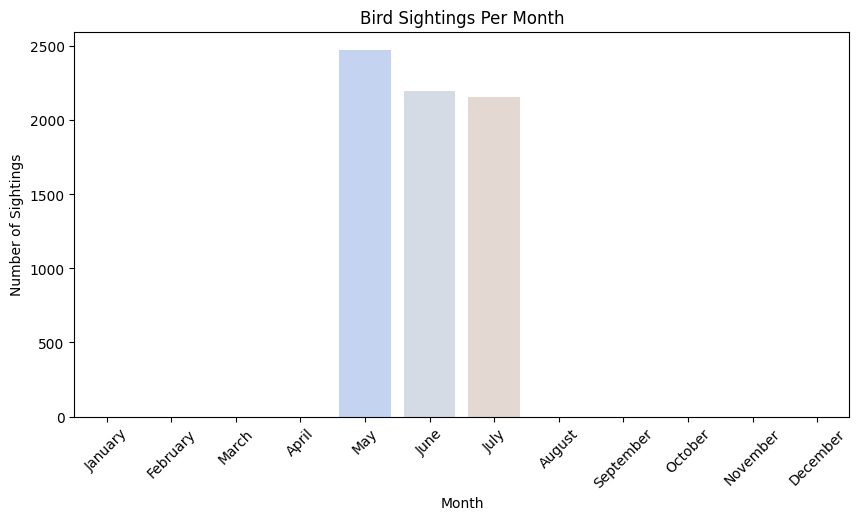

In [21]:
# Bird Sightings accoress months
import matplotlib.pyplot as plt
import seaborn as sns

# convert the data column to dataframe
Grassland_df['Date']=pa.to_datetime(Grassland_df['Date'], format="%y-%m-%d")

# Extract the month name
Grassland_df['Month'] = Grassland_df['Date'].dt.strftime('%B')  # Extracts full month name

# Order months correctly for plotting
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Plot Bird Sightings Per Month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=Grassland_df, palette="coolwarm", order=month_order)
plt.xlabel("Month")
plt.ylabel("Number of Sightings")
plt.title("Bird Sightings Per Month")
plt.xticks(rotation=45)  
plt.show()

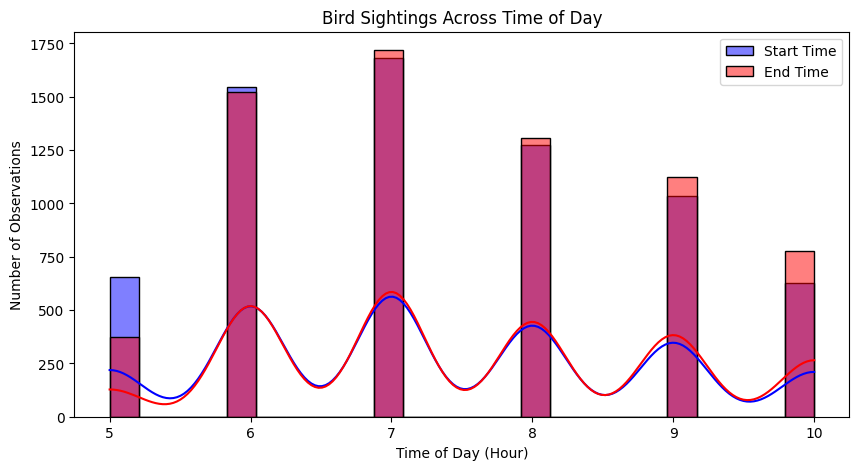

In [22]:
# Bird Activity Based on Start & End Time
# Convert Start_Time and End_Time to datetime format and extract the hour
Grassland_df['Start_Time'] = pa.to_datetime(Grassland_df['Start_Time'], format='%H:%M:%S').dt.hour
Grassland_df['End_Time'] = pa.to_datetime(Grassland_df['End_Time'], format='%H:%M:%S').dt.hour

# Plot Bird Activity Based on Start & End Time
plt.figure(figsize=(10,5))
sns.histplot(Grassland_df['Start_Time'], bins=24, kde=True, color="blue", label="Start Time")
sns.histplot(Grassland_df['End_Time'], bins=24, kde=True, color="red", label="End Time")
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Number of Observations")
plt.title("Bird Sightings Across Time of Day")
plt.legend()
plt.show()

C:\Users\nsiva\AppData\Local\Temp\ipykernel_27136\1297003483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="coolwarm")


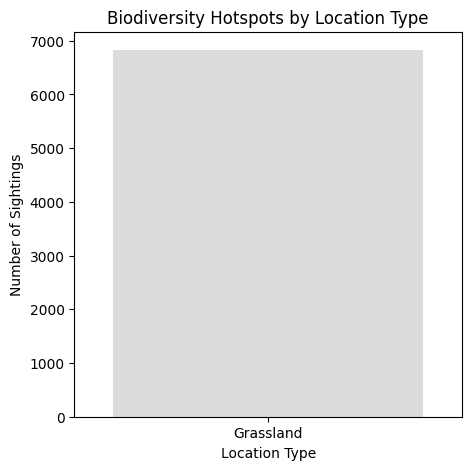

In [23]:
# Group by Location_Type and count sightings
location_counts = Grassland_df['Location_Type'].value_counts()

# Plot Biodiversity Hotspots by Location Type
plt.figure(figsize=(5, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="coolwarm")
plt.xlabel("Location Type")
plt.ylabel("Number of Sightings")
plt.title("Biodiversity Hotspots by Location Type")
plt.xticks(rotation=0)  
plt.show()

C:\Users\nsiva\AppData\Local\Temp\ipykernel_27136\3912365759.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_plots.index, y=top_plots.values, palette="viridis")


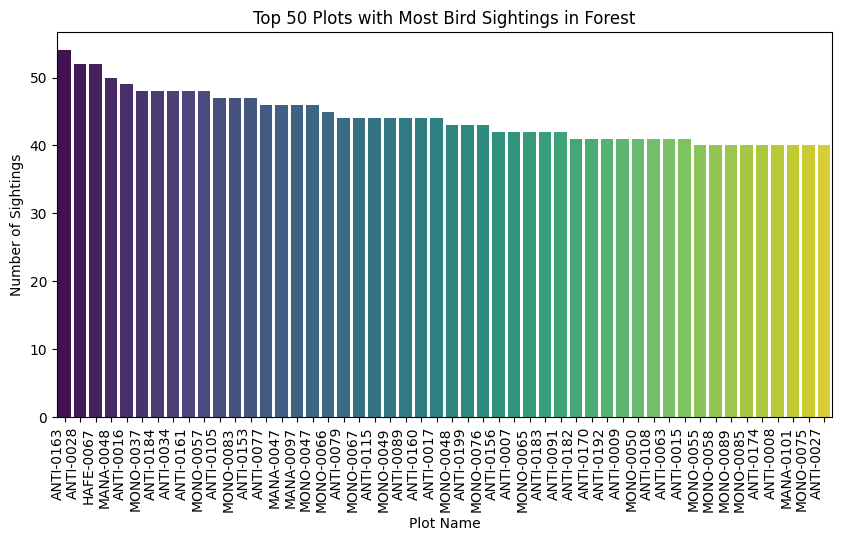

In [24]:
# Select the top 50 most frequent plots
top_plots = Grassland_df['Plot_Name'].value_counts().nlargest(50)

# Plot Top 10 Observations by Plot Name
plt.figure(figsize=(10, 5))
sns.barplot(x=top_plots.index, y=top_plots.values, palette="viridis")
plt.xlabel("Plot Name")
plt.ylabel("Number of Sightings")
plt.title("Top 50 Plots with Most Bird Sightings in Forest")
plt.xticks(rotation=90, ha="right")  # Rotate for better visibility
plt.show()

In [25]:
# Count total unique bird species
unique_species_count = Grassland_df['Scientific_Name'].nunique()
print(f"Total Unique Bird Species Observed: {unique_species_count}")

Total Unique Bird Species Observed: 107


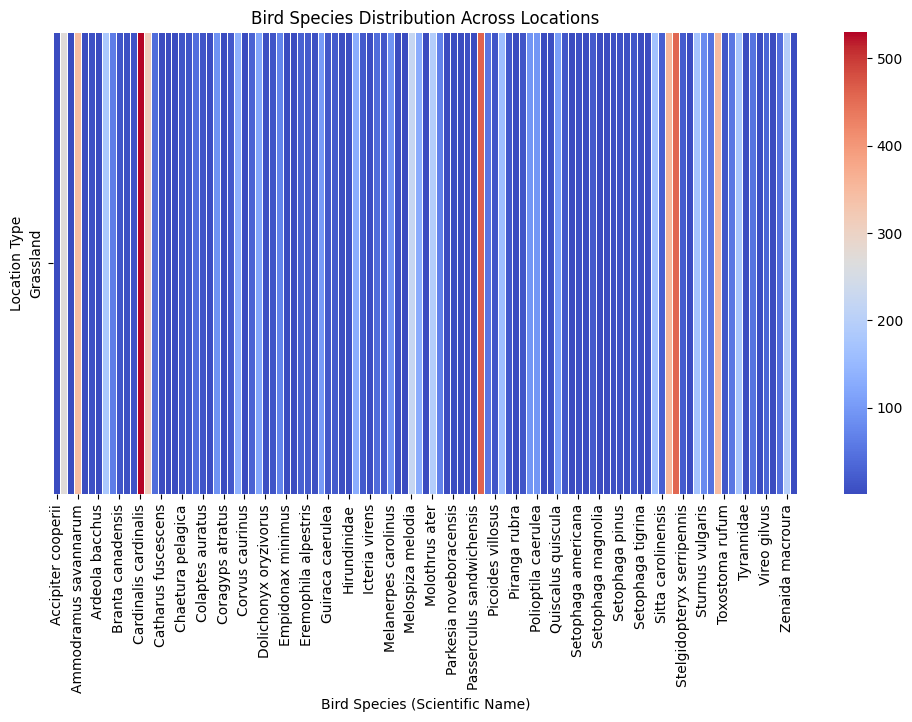

In [26]:
# Create a pivot table for heatmap (rows = Location_Type, columns = Scientific_Name, values = counts)
heatmap_data = Grassland_df.pivot_table(index='Location_Type', columns='Scientific_Name', aggfunc='size', fill_value=0)

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Bird Species (Scientific Name)")
plt.ylabel("Location Type")
plt.title("Bird Species Distribution Across Locations")
plt.show()

<Axes: xlabel='ID_Method', ylabel='count'>

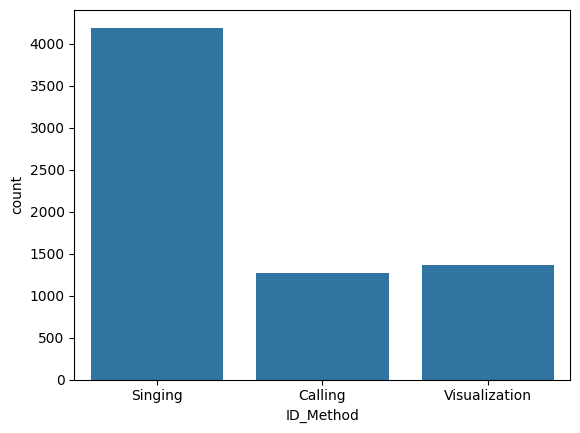

In [27]:
# Method used to identify the species and counts
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="ID_Method",data=Grassland_df)

<Axes: xlabel='Observer', ylabel='count'>

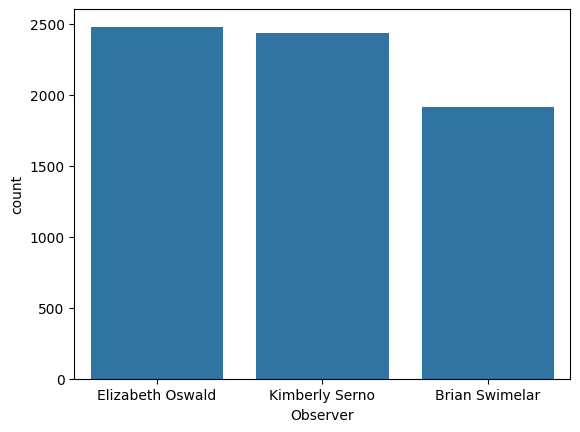

In [28]:
# Number of Observation count of Observer
sns.countplot(x='Observer',data=Grassland_df)